## **Julio García Salas - 22076**
## **Sofía García - 22210**

# **Hoja de trabajo #3**

# **1. Cargar los datos**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print(f"Train dataset: {train_df.shape}")
print(f"Test dataset: {test_df.shape}")

train_df.head()


Train dataset: (1460, 81)
Test dataset: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **1️⃣ Descripción General del Dataset**

El conjunto de datos contiene información detallada sobre viviendas y su precio de venta (`SalePrice`). Se presentan las primeras 5 filas del dataset para visualizar la estructura de las variables.

### **📌 Observaciones Clave**
- **Total de columnas:** 81
- **La columna objetivo (`SalePrice`) está incluida en el dataset.**
- **Tipos de variables presentes:**
  - **Numéricas:** Ej. `LotArea`, `MoSold`, `YrSold`, `SalePrice`
  - **Categóricas:** Ej. `MSZoning`, `Street`, `Alley`, `SaleType`, `SaleCondition`
- **Posibles valores nulos en columnas como `Alley`, `PoolQC`, `Fence`, `MiscFeature`** (se observan valores `NaN`).



# **2.  Descripción de los datos**

In [12]:
train_df.info()

train_df.describe()

missing_values = train_df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

## **2️⃣ Estructura y Tipos de Datos**

El conjunto de datos contiene **1460 registros** y **81 columnas**, con una combinación de variables numéricas y categóricas. A continuación, se detallan los tipos de datos y la cantidad de valores no nulos por variable.

### **📌 Resumen de los Tipos de Datos**
- **35 columnas numéricas (int64)**
- **3 columnas de tipo flotante (float64)**
- **43 columnas categóricas (object)**

### **📊 Variables con Valores Nulos**
Algunas variables contienen valores faltantes que podrían impactar el análisis y los modelos de regresión.

| Variable        | Valores No Nulos | Tipo de Dato  |
|---------------|----------------|-------------|
| **LotFrontage** | 1201 / 1460 | `float64` |
| **Alley** | 91 / 1460 | `object` |
| **MasVnrType** | 1452 / 1460 | `object` |
| **FireplaceQu** | 770 / 1460 | `object` |
| **PoolQC** | 7 / 1460 | `object` |
| **Fence** | 281 / 1460 | `object` |
| **MiscFeature** | 54 / 1460 | `object` |

💡 **Observaciones sobre valores nulos:**
- Variables como **`Alley`**, **`PoolQC`**, **`Fence`**, y **`MiscFeature`** tienen una gran cantidad de valores faltantes y podrían no aportar mucho valor al modelo.
- **`LotFrontage`** tiene 259 valores nulos, lo que podría impactar su uso como predictor.
- Se deben definir estrategias para manejar los valores nulos, ya sea eliminando las variables, imputándolas o reemplazándolas con valores predeterminados.



# **3. Análisis exploratorio**

## **a. Distribución de la Variable SalePrice**

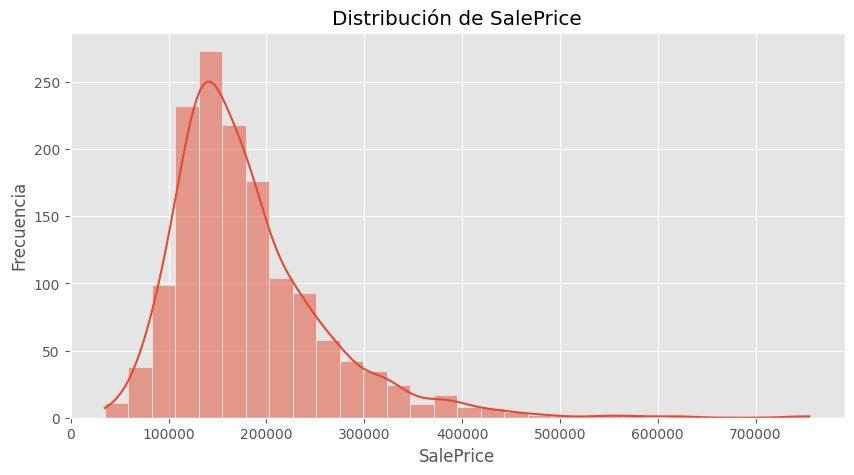

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(train_df["SalePrice"], bins=30, kde=True)
plt.xlabel("SalePrice")
plt.ylabel("Frecuencia")
plt.title("Distribución de SalePrice")
plt.show()

# Estadísticas clave
train_df["SalePrice"].describe()


## **3️⃣ Distribución de la Variable Objetivo (`SalePrice`)**

El objetivo del modelo es predecir `SalePrice`, por lo que es fundamental analizar su distribución. A continuación, se presenta un histograma con la densidad de la variable objetivo.

### **🔍 Observaciones Clave**
1. **Sesgo Positivo (Right-Skewed):**  
   - La distribución muestra un sesgo a la derecha, con una larga cola hacia valores altos.
   - Esto indica que hay algunas viviendas con precios excepcionalmente altos en comparación con el resto.

2. **Precio Promedio y Mediana:**  
   - **Media (`mean`):** 180,921 USD  
   - **Mediana (`50%`):** 163,000 USD  
   - La mediana es menor que la media, lo que confirma que la distribución está sesgada.

3. **Rango de Precios:**  
   - **Mínimo:** 34,900 USD  
   - **Máximo:** 755,000 USD  
   - **El 75% de las casas cuestan menos de 214,000 USD.**

4. **Posibles Valores Atípicos:**  
   - Existen valores muy altos en `SalePrice`, lo que podría influir en los modelos de predicción.
   - Se recomienda analizar estos valores en conjunto con otras variables para decidir si deben transformarse o eliminarse.

---

## **⚠️ Posibles Acciones**
✅ **Transformación Logarítmica:**  
   - Debido al sesgo en la distribución, aplicar `log(SalePrice)` podría mejorar la precisión del modelo.  
   - Esto ayudaría a que los modelos de regresión lineal trabajen mejor con los datos.  

✅ **Identificación de Valores Atípicos:**  
   - Se debe analizar `SalePrice` en función de otras variables como `GrLivArea` y `OverallQual` para ver si los valores extremos corresponden a patrones esperados o son outliers.

✅ **Comparación con Variables Predictoras:**  
   - Se deben examinar las correlaciones con variables clave como `GrLivArea`, `TotalBsmtSF`, y `OverallQual` antes de aplicar la regresión.




## **b. Valores atípicos en SalePrice**

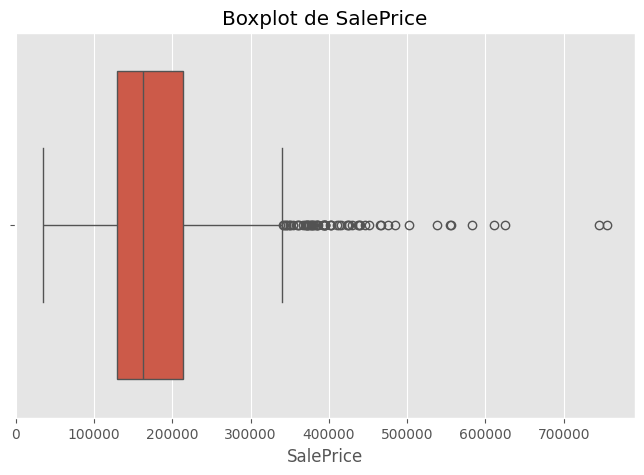

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=train_df["SalePrice"])
plt.title("Boxplot de SalePrice")
plt.show()


# **Análisis Exploratorio - Detección de Valores Atípicos en `SalePrice`**

### **🔍 Observaciones Clave**
1. **Presencia de Valores Atípicos:**  
   - Existen **múltiples valores fuera de los bigotes del boxplot** a partir de aproximadamente **400,000 USD**.
   - Los valores más extremos superan los **700,000 USD**.

2. **Percentiles y Rango Intercuartílico (IQR):**  
   - **25% (Q1):** 129,975 USD  
   - **50% (Mediana):** 163,000 USD  
   - **75% (Q3):** 214,000 USD  
   - **Valores superiores a `Q3 + 1.5*IQR` se consideran outliers.**  

   **Cálculo del IQR:**  
   - IQR = Q3 - Q1 = 214,000 - 129,975 = 84,025 Límite superior = Q3 + 1.5 * IQR = 214,000 + (1.5 * 84,025) = 340,037.5

   - **Valores mayores a 340,037 USD podrían considerarse valores atípicos.**  

3. **Impacto en Modelos de Regresión:**  
- Los valores atípicos pueden afectar los modelos de regresión lineal, ya que tienden a influir desproporcionadamente en los coeficientes.
- Se debe evaluar si estos valores extremos siguen un patrón o si deben ser eliminados o transformados.

---

## **⚠️ Posibles Acciones**
✅ **Transformación Logarítmica de `SalePrice`:**  
- Aplicar `log(SalePrice)` puede ayudar a reducir el impacto de los valores atípicos.  

✅ **Eliminación de Outliers:**  
- Se pueden eliminar los valores que superen **340,000 USD** si afectan negativamente el rendimiento del modelo.  
- Otra opción es **revisar qué características tienen en común** las casas con precios extremos para tomar decisiones basadas en evidencia.

✅ **Uso de Modelos Robust Regression:**  
- En lugar de usar regresión lineal estándar, se pueden explorar modelos robustos como **RANSAC Regression** o **Gradient Boosting**, que son menos sensibles a valores extremos.


## **c. Correlación de Variables Numéricas con SalePrice**

C:\Users\garci\AppData\Local\Temp\ipykernel_31360\4012237561.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette="viridis")


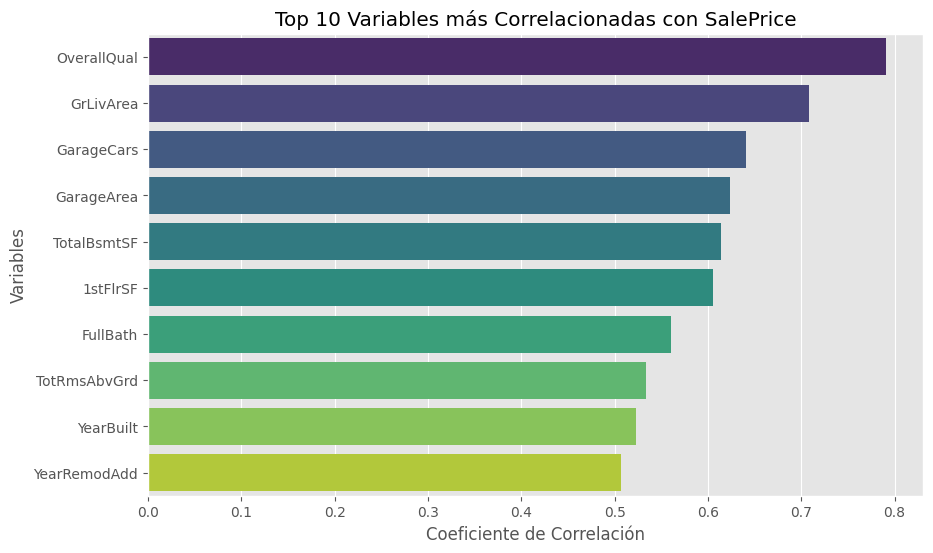

In [15]:
correlation_matrix = train_df.select_dtypes(include=['number']).corr()["SalePrice"].sort_values(ascending=False)

top_corr_features = correlation_matrix[1:11]

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr_features.values, y=top_corr_features.index, palette="viridis")
plt.xlabel("Coeficiente de Correlación")
plt.ylabel("Variables")
plt.title("Top 10 Variables más Correlacionadas con SalePrice")
plt.show()


# **Análisis Exploratorio - Correlación de Variables Numéricas con `SalePrice`**

### **🔍 Observaciones Clave**
1. **Las variables con mayor correlación positiva con `SalePrice` son:**
   - **`OverallQual` (0.79):** La calidad general de la construcción es la variable más influyente en el precio de las casas.
   - **`GrLivArea` (0.71):** El área habitable total sobre el suelo tiene una alta relación con `SalePrice`.
   - **`GarageCars` y `GarageArea` (~0.62 - 0.64):** La cantidad de autos que caben en el garaje y su tamaño son importantes para la valoración de la vivienda.

2. **Las demás variables con fuerte correlación incluyen:**
   - **`TotalBsmtSF` (0.61):** El área total del sótano tiene una relación considerable con `SalePrice`.
   - **`1stFlrSF` (0.60):** El tamaño del primer piso también influye en el precio de las viviendas.
   - **`FullBath` (0.56):** El número total de baños completos impacta en el precio final.
   - **`TotRmsAbvGrd` (0.53):** Más habitaciones por encima del suelo tienden a correlacionarse con precios más altos.
   - **`YearBuilt` (0.52):** Las casas más nuevas suelen venderse a precios más altos.
   - **`YearRemodAdd` (0.51):** Las remodelaciones aumentan el valor de una propiedad.

3. **Conclusiones sobre la Correlación:**
   - **Se observa una fuerte relación entre el tamaño, la calidad y el precio de las viviendas.**
   - **La edad y remodelaciones también juegan un papel importante en la valuación del inmueble.**
   - **El número de habitaciones y baños tiene impacto, aunque menor que el tamaño y la calidad general.**
   - **Variables relacionadas con sótanos y garajes también tienen correlaciones significativas.**

---

## **⚠️ Posibles Acciones**
✅ **Selección de Variables para Modelado:**  
   - Las variables con alta correlación pueden ser incluidas en la regresión para mejorar la predicción.  
   - Se debe evitar el problema de **multicolinealidad** (cuando dos o más variables están altamente correlacionadas entre sí).  

✅ **Análisis de Multicolinealidad:**  
   - Se recomienda calcular el **VIF (Variance Inflation Factor)** para determinar si algunas variables aportan información redundante.  

✅ **Transformaciones Adicionales:**  
   - `SalePrice` puede beneficiarse de una **transformación logarítmica** para mejorar la linealidad con estas variables.  

✅ **Posible Eliminación de Variables con Baja Correlación:**  
   - Variables con **baja correlación** no son útiles para modelos de regresión lineal. Se debe evaluar si es necesario incluirlas.  



## **d. Cantidad de valores únicos en variables categóricas**

In [16]:
categorical_features = train_df.select_dtypes(include=['object']).nunique().sort_values(ascending=False)

print(categorical_features)


Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
HouseStyle        8
RoofMatl          8
Condition2        8
Functional        7
BsmtFinType2      6
RoofStyle         6
BsmtFinType1      6
SaleCondition     6
Heating           6
Foundation        6
GarageType        6
ExterCond         5
LotConfig         5
MSZoning          5
GarageCond        5
GarageQual        5
HeatingQC         5
Electrical        5
BldgType          5
FireplaceQu       5
LandContour       4
LotShape          4
KitchenQual       4
MiscFeature       4
Fence             4
BsmtCond          4
ExterQual         4
BsmtExposure      4
BsmtQual          4
LandSlope         3
PoolQC            3
GarageFinish      3
PavedDrive        3
MasVnrType        3
Utilities         2
Alley             2
Street            2
CentralAir        2
dtype: int64


# **Análisis Exploratorio - Variables Categóricas**

## **🔍 Observaciones Clave**
1. **Variables con Alta Cardinalidad (Muchas Categorías)**  
   - `Neighborhood` (25 categorías) y `Exterior1st` / `Exterior2nd` (15-16 categorías) pueden ser difíciles de codificar directamente.  
   - Es posible agrupar algunos valores similares para reducir la cantidad de categorías.  

2. **Variables con Baja Cardinalidad (Pocas Categorías)**  
   - `Street`, `CentralAir` y `Alley` tienen solo **2 valores únicos**, lo que las hace buenas candidatas para conversión a variables binarias.  

3. **Posibles Problemas con Variables Categóricas**  
   - Variables como `HeatingQC`, `GarageQual`, y `FireplaceQu` tienen **valores ordinales** (calidad baja, media, alta). En lugar de aplicar One-Hot Encoding, podrían convertirse en **valores numéricos ordinales** para mejorar la predicción.  

---

## **⚠️ Posibles Acciones**
✅ **Codificación de Variables Categóricas:**  
   - **One-Hot Encoding:** Para variables con pocas categorías (`MSZoning`, `SaleType`, `RoofStyle`).  
   - **Agrupación de Categorías:** Para variables con demasiados valores (`Neighborhood`, `Exterior1st`).  
   - **Conversión a Escalas Numéricas:** Para variables ordinales (`HeatingQC`, `GarageQual`).  

✅ **Análisis de Impacto de Variables Categóricas en `SalePrice`:**  
   - Se deben realizar boxplots para evaluar si estas variables tienen una relación significativa con el precio de las viviendas.  

✅ **Evaluación de Necesidad de Transformación:**  
   - Variables binarias (`CentralAir`, `Street`) pueden ser convertidas a `0/1`.  
   - Variables con valores faltantes (`Alley`, `FireplaceQu`) pueden ser tratadas con **una categoría adicional ("No disponible")**.  



## **e. Transformación Logarítmica de SalePrice**

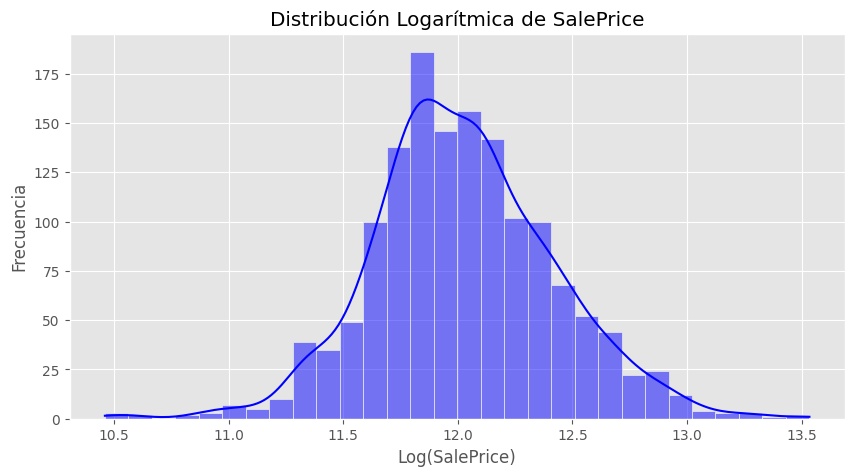

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(train_df["SalePrice"]), bins=30, kde=True, color="blue")
plt.xlabel("Log(SalePrice)")
plt.ylabel("Frecuencia")
plt.title("Distribución Logarítmica de SalePrice")
plt.show()


# **Análisis Exploratorio - Transformación Logarítmica de `SalePrice`**

### **🔍 Observaciones Clave**
1. **Corrección del Sesgo Positivo:**  
   - La distribución original de `SalePrice` mostraba una asimetría a la derecha (valores altos muy dispersos).  
   - Con la transformación `log1p(SalePrice)`, la distribución se vuelve más simétrica y se asemeja más a una distribución normal.  

2. **Importancia para Modelos Lineales:**  
   - Los modelos de regresión lineal **funcionan mejor cuando la variable objetivo sigue una distribución normal**.  
   - Esta transformación permite que los coeficientes del modelo sean más interpretables y evita que valores extremos dominen la predicción.  

3. **Escala y Rango de Valores:**  
   - En lugar de tener precios que van desde **34,900 USD hasta 755,000 USD**, la escala logarítmica comprime estos valores dentro de un **rango más estrecho (~10.5 a ~13.5 en logaritmo natural)**.  
   - Esto ayuda a que el modelo sea más estable y menos sensible a valores extremos.  

---

## **⚠️ Posibles Acciones**
✅ **Mantener `Log(SalePrice)` como la variable objetivo en la regresión:**  
   - Esto mejorará la capacidad predictiva del modelo y reducirá problemas de heterocedasticidad.  




## **f. Detección de valores atípicos en GrLivArea**

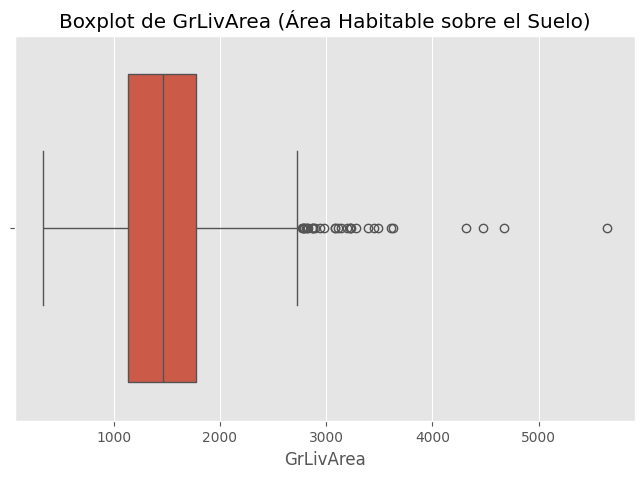

      GrLivArea  SalePrice
523        4676     184750
691        4316     755000
1182       4476     745000
1298       5642     160000


In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=train_df["GrLivArea"])
plt.title("Boxplot de GrLivArea (Área Habitable sobre el Suelo)")
plt.show()

outliers_grlivarea = train_df[train_df["GrLivArea"] > 4000][["GrLivArea", "SalePrice"]]
print(outliers_grlivarea)


# **Análisis Exploratorio - Valores Atípicos en `GrLivArea` (Área Habitable sobre el Suelo)**

### **🔍 Observaciones Clave**
1. **Presencia de Valores Atípicos Extremos:**  
   - Se observan **varios valores fuera del rango intercuartílico (IQR)**.  
   - Algunas casas tienen áreas habitables muy grandes en comparación con el resto.  

2. **Casas con `GrLivArea` extremadamente altas:**  
- La casa con **5642 `GrLivArea`** tiene un precio relativamente bajo (160,000 USD), lo que sugiere que podría ser un **outlier influenciando el modelo de manera no deseada**.  
- Algunas casas con gran tamaño tienen precios altos (**745,000 - 755,000 USD**), lo que puede afectar la relación lineal con `SalePrice`.  

3. **Impacto en la Regresión Lineal:**  
- La regresión lineal es **sensible a valores atípicos**.  
- Si estas observaciones no siguen la tendencia del resto de los datos, podrían distorsionar la predicción.  

---

## **⚠️ Posibles Acciones**
✅ **Eliminar los Valores Atípicos Más Extremos:**  
- Se podrían eliminar las casas con `GrLivArea > 4000`, especialmente si su precio no sigue la tendencia esperada.  

✅ **Transformación Logarítmica:**  
- Similar a `SalePrice`, aplicar `log(GrLivArea)` puede reducir la influencia de valores extremadamente altos.  




## **g. Relación entre GrLivArea y SalePrice**

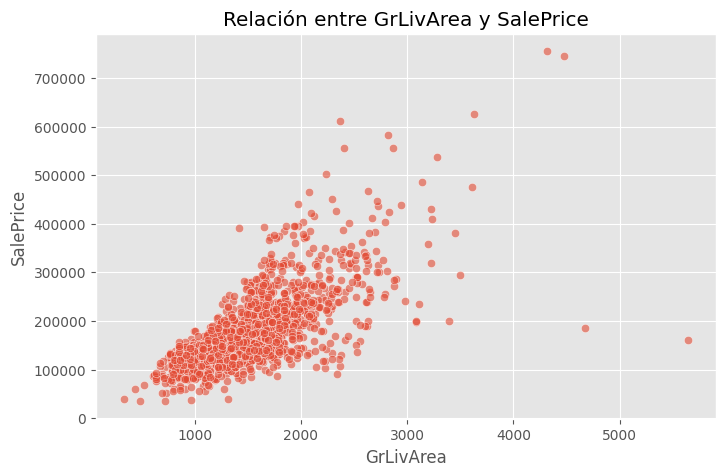

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=train_df["GrLivArea"], y=train_df["SalePrice"], alpha=0.6)
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("Relación entre GrLivArea y SalePrice")
plt.show()


# **Análisis Exploratorio - Relación entre `GrLivArea` y `SalePrice`**


### **🔍 Observaciones Clave**
1. **Tendencia Lineal General:**  
   - Existe una **correlación positiva fuerte** entre `GrLivArea` (Área Habitable) y `SalePrice` (Precio de Venta).  
   - En general, a mayor `GrLivArea`, mayor es el precio de venta de la vivienda.  

2. **Presencia de Valores Atípicos:**  
   - Se observan **varios valores fuera del patrón general**, especialmente en `GrLivArea > 4000`.  
   - Algunas casas tienen **áreas grandes pero precios bajos**, lo que podría indicar registros atípicos.  

3. **Posibles Problemas en la Regresión Lineal:**  
   - La presencia de **valores extremos en `GrLivArea` puede afectar la estabilidad del modelo**.  
   - Si bien la relación general es lineal, los outliers pueden causar sesgos en los coeficientes de la regresión.  



 




# **4. Análisis de relaciones con SalePrice**

### **a. Relación de OverallQual con SalePrice**

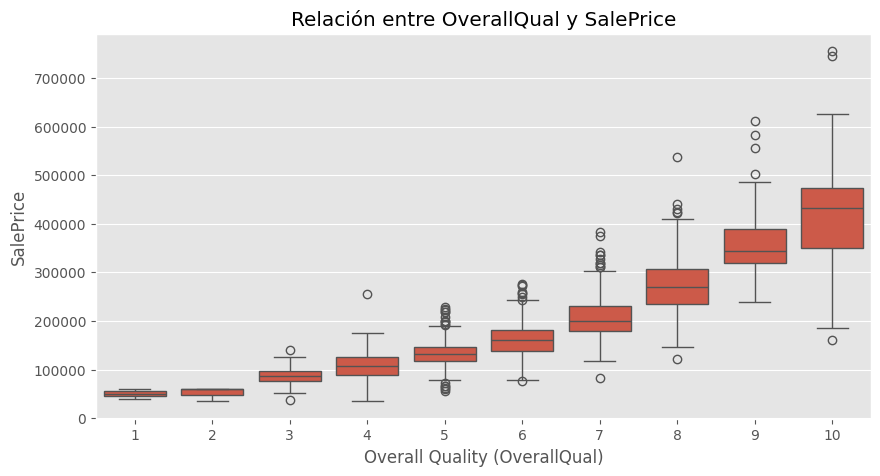

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="OverallQual", y="SalePrice", data=train_df)
plt.xlabel("Overall Quality (OverallQual)")
plt.ylabel("SalePrice")
plt.title("Relación entre OverallQual y SalePrice")
plt.show()


# **Análisis Exploratorio - Relación entre `OverallQual` y `SalePrice`**


### **🔍 Observaciones Clave**
1. **Relación Positiva Fuerte:**  
   - Existe una **correlación positiva clara** entre la calidad de la construcción (`OverallQual`) y el precio de venta (`SalePrice`).  
   - A medida que aumenta `OverallQual`, el precio de la vivienda tiende a ser más alto.  

2. **Aumento de Dispersión en Calidades Altas:**  
   - Para valores bajos de `OverallQual` (1-4), los precios son consistentemente bajos.  
   - Para valores altos (8-10), hay **mayor dispersión en `SalePrice`**, lo que indica que otros factores pueden influir en el precio de las casas de mayor calidad.  

3. **Valores Atípicos en Calidades Bajas y Altas:**  
   - En `OverallQual = 10`, algunos precios son **notablemente bajos** en comparación con la media del grupo.  
   - En `OverallQual = 1-3`, algunas casas tienen **precios más altos de lo esperado**, lo que podría indicar excepciones en la relación esperada.  




### **b. Relación de GarageCars con SalePrice**

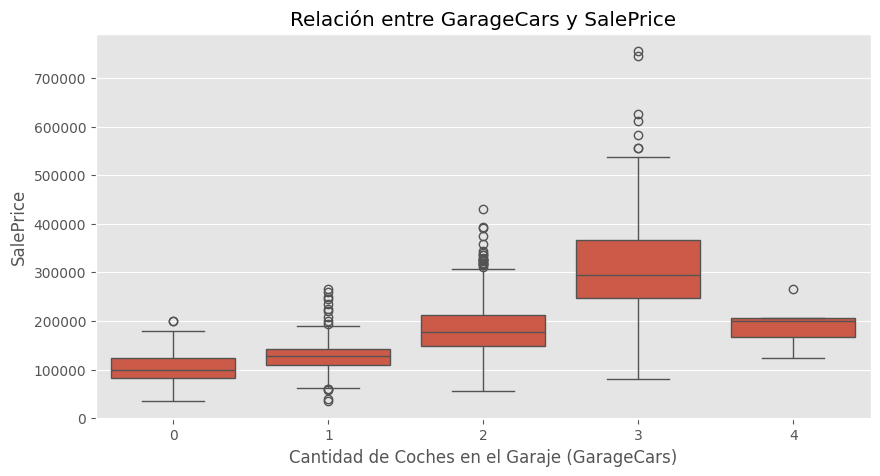

In [23]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="GarageCars", y="SalePrice", data=train_df)
plt.xlabel("Cantidad de Coches en el Garaje (GarageCars)")
plt.ylabel("SalePrice")
plt.title("Relación entre GarageCars y SalePrice")
plt.show()


# **Análisis Exploratorio - Relación entre `GarageCars` y `SalePrice`**


### **🔍 Observaciones Clave**
1. **Tendencia Positiva:**  
   - Existe una **correlación positiva clara** entre la cantidad de coches en el garaje (`GarageCars`) y el precio de venta (`SalePrice`).  
   - A medida que aumenta `GarageCars`, el precio promedio de la vivienda también tiende a aumentar.  

2. **Distribución por Cantidad de Coches:**  
   - **0 autos:** Viviendas sin garaje tienden a ser las más baratas, con pocos casos que superan los **200,000 USD**.  
   - **1 auto:** Rango de precios más amplio, pero la mayoría está entre **100,000 y 200,000 USD**.  
   - **2 autos:** Categoría más común, con precios que rondan los **150,000 - 300,000 USD**.  
   - **3 autos:** Precio medio más alto, entre **200,000 - 400,000 USD**, con algunos valores atípicos.  
   - **4 autos o más:** Pocos casos, con precios más variables y algunos valores atípicos.  

3. **Valores Atípicos:**  
   - En todas las categorías hay valores que se alejan del patrón general.  
   - Para `GarageCars = 3 y 4`, algunos precios están **por debajo del promedio esperado**, lo que sugiere que otras variables pueden influir en el valor de la propiedad.  

